# KMean Clustering and Agglomerative Hierarchical Clustering

### Priyam Banerjee
### Dept. of Computer Science
### University of Texas at Arlington

### CITATIONS :
https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html
https://michhar.github.io/confusion-matrix-code-revealed/#step-2-second-way
https://stackoverflow.com/questions/47708865/confusion-matrix-for-clustering-in-scikit-learn
https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f
http://www.scikit-yb.org/en/latest/api/cluster/elbow.html
https://bl.ocks.org/rpgove/0060ff3b656618e9136b
https://www.linkedin.com/pulse/finding-optimal-number-clusters-k-means-through-elbow-asanka-perera
https://pythonprogramminglanguage.com/kmeans-elbow-method/
https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_clustering_metrics.html#sphx-glr-auto-examples-cluster-plot-agglomerative-clustering-metrics-py
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.euclidean_distances.html
https://medium.com/dataholiks-distillery/l2-distance-matrix-vectorization-trick-26aa3247ac6c
https://nlp.stanford.edu/IR-book/completelink.html
http://www.tqmp.org/RegularArticles/vol11-1/p008/p008.pdf
https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_clustering_metrics.html
https://scikit-learn.org/stable/auto_examples/cluster/plot_ward_structured_vs_unstructured.html
https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_clustering.html
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances.html
https://www.dummies.com/programming/big-data/data-science/data-science-performing-hierarchical-clustering-with-python/
https://matplotlib.org/users/legend_guide.html
https://stackoverflow.com/questions/23698850/manually-set-color-of-points-in-legend
https://stackoverflow.com/questions/8924173/how-do-i-print-bold-text-in-python

## Details

The purpose of this work is to cluster drug users using K-means clustering and Hierarchical Agglomerative clustering models and to visualize clusters for predicted and actual cluster labels.


The dataset is part of "Drug consumption". More information on : https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29#. The class attribute has been transformed into a binary classification where '0' indicates NOUSER and '1' indicates USER.


In [17]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Required Python Packages 

In [18]:
# Import required Python packages here
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import metrics
import numpy as np
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import itertools
# More library modules are used further, as and when we used it

## K-Means Clustering

### Determining “k” value from the elbow method

In this task, we will be using the elbow method to determine the optimal number of clusters for k-means clustering.

We need some way to determine whether we are using the right number of clusters when using k-means clustering. One method to validate the number of clusters is the elbow method. 

The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k (k will be from 1 to 10 in this task), and for each value of k calculate the sum of squared errors (SSE). Then, plot a line chart of the SSE for each value of k. If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best. The idea is that we want a small SSE, but that the SSE tends to decrease toward 0 as we increase k (the SSE is 0 when k is equal to the number of data points in the dataset, because then each data point is a cluster, and there is no error between it and the center of its cluster). So our goal is to choose a small value of k that still has a low SSE, and the elbow usually represents where we start to have diminishing returns by increasing k.

In [19]:
#### Reading Drug Data from CSV using Pandas DataFrame ####
data = pd.read_csv('drug_users.csv')
print(data.shape)
data.head() # Showing the head of our dataset


(1885, 13)


,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,CLASS
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,0
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,0


In [20]:
#### A little description of our dataset (for my own convenience)
data.describe()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,CLASS
count,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,0.03461,-0.000256,-0.003806,0.355542,-0.309577,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,0.007216,-0.003292,0.554377
std,0.87836,0.482588,0.950078,0.700335,0.166226,0.998106,0.997448,0.996229,0.997440,0.997523,0.954435,0.963701,0.497166
min,-0.95197,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480,0.000000
25%,-0.95197,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930,0.000000
50%,-0.07854,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870,1.000000
75%,0.49788,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400,1.000000
max,2.59171,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730,1.000000


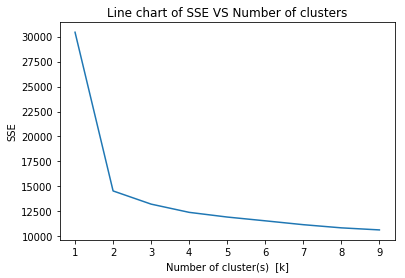

From the above line chart, the elbow is found at k = 2

For n_clusters=2, The Silhouette Coefficient is 0.29263016382657026
For n_clusters=3, The Silhouette Coefficient is 0.2409706217717849
For n_clusters=4, The Silhouette Coefficient is 0.26964591615376127
For n_clusters=5, The Silhouette Coefficient is 0.23890078325067943
For n_clusters=6, The Silhouette Coefficient is 0.2240514357682737
For n_clusters=7, The Silhouette Coefficient is 0.2063308051185758
For n_clusters=8, The Silhouette Coefficient is 0.2044698221403365
For n_clusters=9, The Silhouette Coefficient is 0.1962000542601485
For n_clusters=10, The Silhouette Coefficient is 0.18000430775588067

Maximum Silhouette Coefficient is 0.29263016382657026 for n_clusters = 2      hence it is chosen as Optimal Number of clusters


In [30]:

sse = {}
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',random_state = 42)
    kmeans.fit(data)
    data["clusters"] = kmeans.labels_
    sse[i] = kmeans.inertia_   # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster(s)  [k]")  
plt.ylabel("SSE")
plt.title("Line chart of SSE VS Number of clusters")
plt.show()
print("From the above line chart, the elbow is found at k = 2\n")

''' Using Silhouette Coefficient to confirm the Optimal Number of Clusters '''
max_silhouette_score = 0.0
optimum_cluster = 0
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(data)
    label = kmeans.labels_
    sil_coeff = silhouette_score(data, label, metric='euclidean')
    if(sil_coeff > max_silhouette_score):
        max_silhouette_score = sil_coeff
        optimum_cluster = n_cluster
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

print("\nMaximum Silhouette Coefficient is {} for n_clusters = {}\
      hence it is chosen as Optimal Number of clusters".format(max_silhouette_score,optimum_cluster))

### Visualization for K-Means Clustering

In this task, we will be performing k-means clustering for k=2 and visualize the predicted training samples and actual training samples on scatter plots. Use 70% of the dataset for training and 30% of the dataset for testing. Performing kmeans for clustering samples for training set. 

Using two subplots for visualizing the predicted training samples and actual training samples on two scatter plots.

Since the dataset has multiple features(dimensions), we won't be able to plot your data on a scatter plot. Thus, we’re going to visualize the data with the help of one of the Dimensionality Reduction techniques, namely Principal Component Analysis (PCA). The idea in PCA is to find a linear combination of the two variables that contains most of the information. This new variable or “principal component” can replace the two original variables. Applying PCA using sklearn module



In [22]:
###################Splitting the dataset 70% for training and 30% for testing

y = data.CLASS
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3) # Splitting up with testing data size as 30%
# Printing out the shapes of the Training and Test set
print("X-Train Shape: ",X_train.shape) 
print("X-Test Shape: ",X_test.shape)
print("Y-Train Shape: ",y_train.shape)
print("Y-Test Shape: ",y_test.shape)

X-Train Shape:  (1319, 14)
X-Test Shape:  (566, 14)
Y-Train Shape:  (1319,)
Y-Test Shape:  (566,)



Prediction accuracy for the normal test dataset with PCA
79.51%

Prediction accuracy for the standardized test dataset with PCA
86.40%


Principal Component 1 without scaling:
 [-0.12 -0.04 -0.11 -0.1   0.01 -0.08  0.11  0.15  0.03  0.02  0.07  0.15
  0.08 -0.94]

Principal Component 1 with scaling:
 [-0.3  -0.23 -0.22 -0.36  0.1   0.12  0.01  0.27 -0.16 -0.25  0.32  0.39
  0.4  -0.25]
[[-0.87  3.36]
 [ 2.41  2.69]
 [ 1.97  1.42]
 ...
 [ 0.75 -2.3 ]
 [-2.43  1.38]
 [-0.65  0.55]]


/home/priyam/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/priyam/anaconda3/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/priyam/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/priyam/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:42: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.


Predicted CLASS of Training Dataset :  [0 1 1 ... 1 0 0]
Coordinates of Centroids :  [[-1.68  0.09]
 [ 1.68 -0.09]]


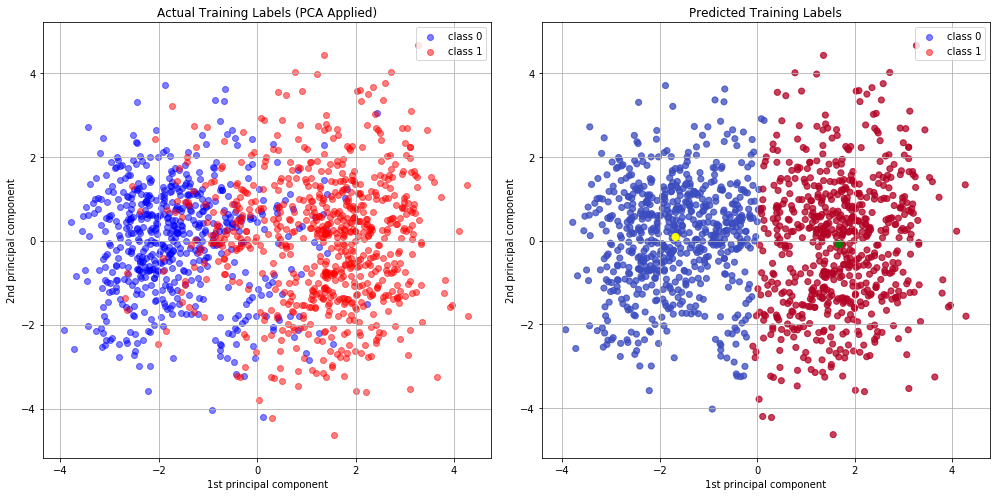

In [23]:
###################Visualizing the predicted training labels vs actual training labels

# Import PCA
from sklearn.decomposition import PCA
from __future__ import print_function
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
#print(__doc__)
RANDOM_STATE = 42
FIG_SIZE = (14, 7)

# Fit to data and predict using pipelined GNB and PCA.
unscaled_clf = make_pipeline(PCA(n_components=2), GaussianNB())
unscaled_clf.fit(X_train, y_train)
pred_test = unscaled_clf.predict(X_test)

# Fit to data and predict using pipelined scaling, GNB and PCA.
std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), GaussianNB())
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)

# Show prediction accuracies in scaled and unscaled data.
print('\nPrediction accuracy for the normal test dataset with PCA')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test)))

print('Prediction accuracy for the standardized test dataset with PCA')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test_std)))

# Extract PCA from pipeline
pca = unscaled_clf.named_steps['pca']
pca_std = std_clf.named_steps['pca']

# Show first principal componenets
print('\nPrincipal Component 1 without scaling:\n', pca.components_[0])
print('\nPrincipal Component 1 with scaling:\n', pca_std.components_[0])

# Scale and use PCA on X_train data for visualization.
scaler = std_clf.named_steps['standardscaler']
X_train_std_pca = pca_std.transform(scaler.transform(X_train))
print(X_train_std_pca)
# Create the KMeans model
k_means = KMeans(n_clusters=optimum_cluster)
k_means.fit(X_train_std_pca)
#print("CLASS of training dataset : ",y_train)
# Model and fit the data to the PCA model
x_kmeans = k_means.fit_predict(X_train_std_pca)
print("Predicted CLASS of Training Dataset : ",x_kmeans)
# Compute cluster centers and predict cluster index for each sample
centroids = k_means.cluster_centers_
print("Coordinates of Centroids : ",centroids)

# visualize standardized vs. untouched dataset with PCA performed
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=FIG_SIZE)

# For...loop to plot the graph for Actual Training Dataset
for l, c, m in zip(range(0, 2), ('blue', 'red'), ('o', 'o')):
    ax1.scatter(X_train_std_pca[y_train == l,0], X_train_std_pca[y_train == l,1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

# For...loop to plot the graph for Predicted Training Dataset
for l, p, m in zip(range(0, 2), ('blue', 'red'), ('o','o')):
    ax2.scatter(X_train_std_pca[:,0], X_train_std_pca[:,1],c=x_kmeans,
                cmap='coolwarm',
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

ax2.scatter(centroids[:, 0], centroids[:, 1], c=('yellow','green'), s=50, alpha=1);
ax1.set_title('Actual Training Labels (PCA Applied)')
ax2.set_title('Predicted Training Labels')

for ax in (ax1, ax2):
    ax.set_xlabel('1st principal component')
    ax.set_ylabel('2nd principal component')
    ax.legend(loc='upper right')
    ax.grid()
    
for m in (ax1,ax2):
    leg = m.get_legend()
    leg.legendHandles[0].set_color('blue')
    leg.legendHandles[1].set_color('red')
plt.tight_layout()
plt.show()


Now, we need to visualize the predicted testing labels versus actual testing labels. Using the trained model in previous step.

/home/priyam/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/priyam/anaconda3/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/priyam/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/priyam/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


Coordinates of Centroids :  [[-1.63 -0.15]
 [ 1.55  0.14]]


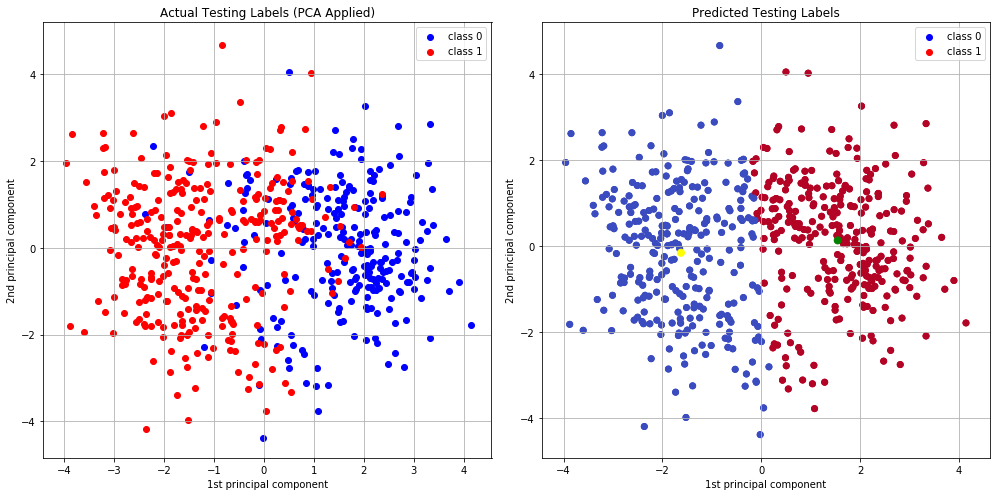

In [24]:
###################Visualizing the predicted testing labels vs actual testing labels


stdClf = make_pipeline(StandardScaler(), PCA(n_components=2), GaussianNB())
stdClf.fit(X_test, y_test)
PredStdTest = std_clf.predict(X_test)
pca_std = stdClf.named_steps['pca']
scaler = stdClf.named_steps['standardscaler']
X_test_pca = pca_std.transform(scaler.transform(X_test))


# predict cluster index for each sample 
# Model and fit the data to the PCA model
y_kmeans = k_means.fit_predict(X_test_pca)
#print("Predicted CLASS of Testing Dataset : ",y_kmeans)
# Compute cluster centers and predict cluster index for each sample
centroids = k_means.cluster_centers_
print("Coordinates of Centroids : ",centroids)


x = X_test_pca[:, 0]
y = X_test_pca[:, 1]

fig, (ax3, ax4) = plt.subplots(ncols=2, figsize=FIG_SIZE)
# Loop....for Visualizing the actual testing labels
for l, c, m in zip(range(0, 2), ('blue', 'red'), ('o', 'o')):
    ax3.scatter(X_test_pca[y_test == l,0], X_test_pca[y_test == l,1],
                color=c,
                label='class %s' % l,
                alpha=1,
                marker=m
                )
# Loop....for Visualizing the predicted testing labels
for l, c, m in zip(range(0, 2), ('blue', 'red'), ('o', 'o')):
    ax4.scatter(x, y, c=y_kmeans,
                cmap='coolwarm',
                label='class %s' % l,
                alpha=1,
                marker=m
                )
ax4.scatter(centroids[:, 0], centroids[:, 1], c=('yellow','green'), s=50, alpha=1);
ax3.set_title('Actual Testing Labels (PCA Applied)')
ax4.set_title('Predicted Testing Labels')

for ax in (ax3, ax4):
    ax.set_xlabel('1st principal component')
    ax.set_ylabel('2nd principal component')
    ax.legend(loc='upper right'),
    ax.grid()
    
for m in (ax3,ax4):
    leg = m.get_legend()
    leg.legendHandles[0].set_color('blue')
    leg.legendHandles[1].set_color('red')
plt.tight_layout()
plt.show()


In this step, we're providing the evaluation of our clustering model. Printing out a confusion matrix.

Confusion matrix, without normalization (True Count)
[[ 27 224]
 [249  66]]
Normalized confusion matrix
[[0.11 0.89]
 [0.79 0.21]]


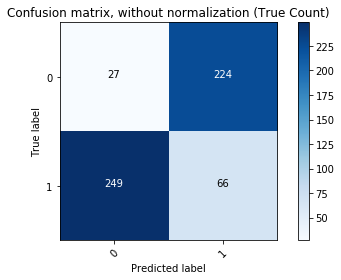

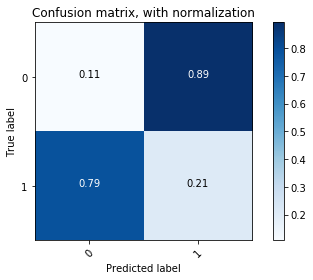

In [25]:
###################Printing out a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization (True Count)')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_kmeans)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=data.CLASS.unique(),
                      title='Confusion matrix, without normalization (True Count)')

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=data.CLASS.unique(),normalize=True,
                      title='Confusion matrix, with normalization')
plt.show()

# Hierarchical Agglomerative  Clustering

## Finding the best Hierarchical Agglomerative Clustering Model

In this task, we will be performing Hierarchical Agglomerative clustering with different linkage methods (complete and average) and different similarity measures (cosine, euclidean, and manhattan) in order to find the best pair of linkage method and similarity measure. Using F1 score for evaluation and take n_clusters = 2.


In [26]:

# Import AgglomerativeClustering
import scipy.cluster.hierarchy
from sklearn.cluster import AgglomerativeClustering
# Import pairwise_distances for calculating pairwise distance matrix
from sklearn.metrics.pairwise import pairwise_distances
# Import f1_score
from sklearn.metrics import f1_score

pair_linkage_and_similarity = {}
maximum_f1_score = 0.0
best_linkage_similarity_pair = ""
## Calculate pairwise distance matrix for X_train
pdm_train = pairwise_distances(X_train_std_pca)

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + cosine
Hclustering_complete_cosine = AgglomerativeClustering(n_clusters=optimum_cluster,affinity='cosine',linkage='complete')
Hclustering_complete_cosine.fit(pdm_train)
completeCosine_Pred = Hclustering_complete_cosine.fit_predict(X_test_pca)
pair_linkage_and_similarity['Complete Linkage Cosine'] = (f1_score(y_test,completeCosine_Pred)*100)

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + euclidean
Hclustering_complete_euclidean = AgglomerativeClustering(n_clusters=optimum_cluster,affinity='euclidean',linkage='complete')
Hclustering_complete_euclidean.fit(pdm_train)
completeEuclidean_Pred = Hclustering_complete_euclidean.fit_predict(X_test_pca)
pair_linkage_and_similarity['Complete Linkage Euclidean'] = (f1_score(y_test,completeEuclidean_Pred)*100)

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + manhattan
Hclustering_complete_manhattan = AgglomerativeClustering(n_clusters=optimum_cluster,affinity='manhattan',linkage='complete')
Hclustering_complete_manhattan.fit(pdm_train)
completeManhattan_Pred = Hclustering_complete_manhattan.fit_predict(X_test_pca)
pair_linkage_and_similarity['Complete Linkage Manhattan'] = (f1_score(y_test,completeManhattan_Pred)*100)

## Model and fit the training data to the AgglomerativeClustering model
## average linkage + cosine
Hclustering_avg_cosine = AgglomerativeClustering(n_clusters=optimum_cluster,affinity='cosine',linkage='average')
Hclustering_avg_cosine.fit(pdm_train)
avgCosine_Pred = Hclustering_avg_cosine.fit_predict(X_test_pca)
pair_linkage_and_similarity['Average Linkage Cosine'] = (f1_score(y_test,avgCosine_Pred)*100)

## Model and fit the training data to the AgglomerativeClustering model
## average linkage + euclidean
Hclustering_avg_euclidean = AgglomerativeClustering(n_clusters=optimum_cluster,affinity='euclidean',linkage='average')
Hclustering_avg_euclidean.fit(pdm_train)
avgEuclidean_Pred = Hclustering_avg_euclidean.fit_predict(X_test_pca)
pair_linkage_and_similarity['Average Linkage Euclidean'] = (f1_score(y_test,avgEuclidean_Pred)*100)

## Model and fit the training data to the AgglomerativeClustering model
## average linkage + manhattan
Hclustering_avg_manhattan = AgglomerativeClustering(n_clusters=optimum_cluster,affinity='manhattan',linkage='average')
Hclustering_avg_manhattan.fit(pdm_train)
avgManhattan_Pred = Hclustering_avg_manhattan.fit_predict(X_test_pca)
pair_linkage_and_similarity['Average Linkage Manhattan'] = (f1_score(y_test,avgManhattan_Pred)*100)

print("F1-score for complete linkage + cosine : ", (f1_score(y_test,completeCosine_Pred)*100))
print("F1-score for complete linkage + euclidean : ", (f1_score(y_test,completeEuclidean_Pred)*100))
print("F1-score for complete linkage + manhattan : ", (f1_score(y_test,completeManhattan_Pred)*100))
print("F1-score for average linkage + cosine : ", (f1_score(y_test,avgCosine_Pred)*100))
print("F1-score for average linkage + euclidean : ", (f1_score(y_test,avgEuclidean_Pred)*100))
print("F1-score for average linkage + manhattan : ", (f1_score(y_test,avgManhattan_Pred)*100))

for key,value in pair_linkage_and_similarity.items():
    if(value > maximum_f1_score):
        maximum_f1_score = value
        best_linkage_similarity_pair = key

print("\nBEST PAIR OF LINKAGE AND SIMILARITY IS {} SINCE BEST F1-SCORE IS {}".format(best_linkage_similarity_pair,maximum_f1_score))


/home/priyam/anaconda3/lib/python3.6/site-packages/sklearn/cluster/hierarchical.py:470: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)
/home/priyam/anaconda3/lib/python3.6/site-packages/sklearn/cluster/hierarchical.py:470: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)
/home/priyam/anaconda3/lib/python3.6/site-packages/sklearn/cluster/hierarchical.py:470: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)
/home/priyam/anaconda3/lib/python3.6/site-packages/sklearn/cluster/hierarchical.py:470: ClusterWarning: scipy.cluster: The symmetric 

F1-score for complete linkage + cosine :  15.32976827094474
F1-score for complete linkage + euclidean :  61.1965811965812
F1-score for complete linkage + manhattan :  22.596964586846546
F1-score for average linkage + cosine :  11.376146788990825
F1-score for average linkage + euclidean :  1.2578616352201257
F1-score for average linkage + manhattan :  1.2578616352201257

BEST PAIR OF LINKAGE AND SIMILARITY IS Complete Linkage Euclidean SINCE BEST F1-SCORE IS 61.1965811965812


## Visualization for Hierarchical Agglomerative Clustering

Finding the best performed model from the previous step and using that model for visualizing the predicted training samples and actual training samples on scatter plots. Using PCA model for visualizing your data (using X_train_std_pca from step above). 

BEST PAIR OF LINKAGE AND SIMILARITY IS  Complete Linkage Euclidean


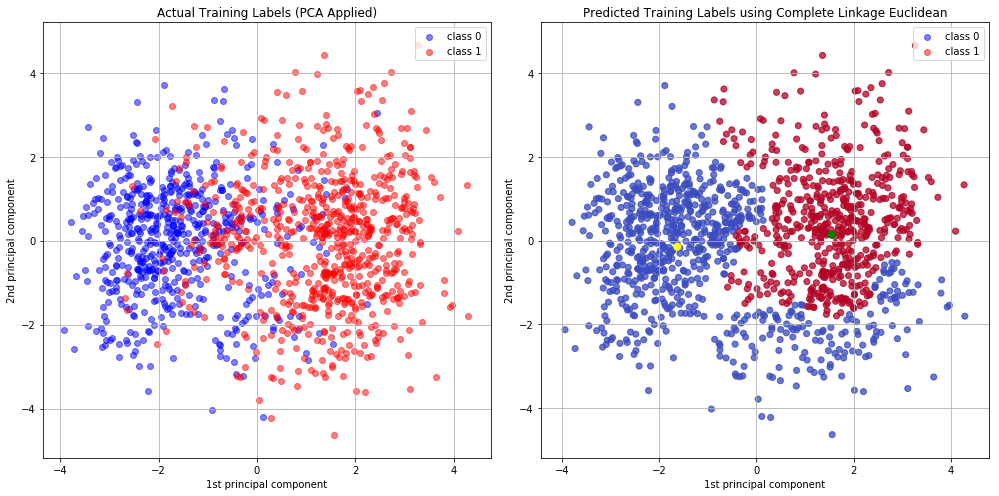

In [27]:
###################Visualizing the predicted training labels vs actual training labels
 
if(best_linkage_similarity_pair == 'Complete Linkage Cosine'):
    print("BEST PAIR OF LINKAGE AND SIMILARITY IS ",best_linkage_similarity_pair)
    best_hierarchical_agglomerative_model = Hclustering_complete_cosine
    predicted_train_label_pred = Hclustering_complete_cosine.fit_predict(X_train_std_pca)
elif(best_linkage_similarity_pair == 'Complete Linkage Euclidean'):
    print("BEST PAIR OF LINKAGE AND SIMILARITY IS ",best_linkage_similarity_pair)
    best_hierarchical_agglomerative_model = Hclustering_complete_euclidean
    predicted_train_label_pred = Hclustering_complete_euclidean.fit_predict(X_train_std_pca)
elif(best_linkage_similarity_pair == 'Complete Linkage Manhattan'):
    print("BEST PAIR OF LINKAGE AND SIMILARITY IS ",best_linkage_similarity_pair)
    best_hierarchical_agglomerative_model = Hclustering_complete_manhattan
    predicted_train_label_pred = Hclustering_complete_manhattan.fit_predict(X_train_std_pca)
elif(best_linkage_similarity_pair == 'Average Linkage Cosine'):
    print("BEST PAIR OF LINKAGE AND SIMILARITY IS ",best_linkage_similarity_pair)
    best_hierarchical_agglomerative_model = Hclustering_avg_cosine
    predicted_train_label_pred = Hclustering_avg_cosine.fit_predict(X_train_std_pca)
elif(best_linkage_similarity_pair == 'Average Linkage Euclidean'):
    print("BEST PAIR OF LINKAGE AND SIMILARITY IS ",best_linkage_similarity_pair)
    best_hierarchical_agglomerative_model = Hclustering_avg_euclidean
    predicted_train_label_pred = Hclustering_avg_euclidean.fit_predict(X_train_std_pca)
elif(best_linkage_similarity_pair == 'Average Linkage Manhattan'):
    print("BEST PAIR OF LINKAGE AND SIMILARITY IS ",best_linkage_similarity_pair)
    best_hierarchical_agglomerative_model = Hclustering_avg_manhattan
    predicted_train_label_pred = Hclustering_avg_manhattan.fit_predict(X_train_std_pca)
    
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=FIG_SIZE)

# For...loop to plot the graph for Actual Training Dataset
for l, c, m in zip(range(0, 2), ('blue', 'red'), ('o', 'o')):
    ax1.scatter(X_train_std_pca[y_train == l,0], X_train_std_pca[y_train == l,1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

# For...loop to plot the graph for Predicted Training Dataset
for l, p, m in zip(range(0, 2), ('blue', 'red'), ('o','o')):
    ax2.scatter(X_train_std_pca[:,0], X_train_std_pca[:,1],c=predicted_train_label_pred,
                cmap='coolwarm',
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

ax2.scatter(centroids[:, 0], centroids[:, 1], c=('yellow','green'), s=50, alpha=1);
ax1.set_title('Actual Training Labels (PCA Applied)')
ax2.set_title('Predicted Training Labels using {}'.format(best_linkage_similarity_pair))

for ax in (ax1, ax2):
    ax.set_xlabel('1st principal component')
    ax.set_ylabel('2nd principal component')
    ax.legend(loc='upper right')
    ax.grid()

for m in (ax1,ax2):
    leg = m.get_legend()
    leg.legendHandles[0].set_color('blue')
    leg.legendHandles[1].set_color('red')
plt.tight_layout()
plt.show()


# Comparing K-Means Clustering and Hierarchical Agglomerative Clustering

## Visualize Clusters 

In this task, we are using whole dataset for training k-means cluster and hierarchical agglomerative clustering. Using the best model for agglomerative clustering. Visualizing the predicted labels from k-means clustering and agglomerative clustering versus actual labels. Basically, we need to plot three scatter plots as subplots. 

(1885, 14)    (1885,)
Accuracy of KMean Model = 50.238726790450926 %


/home/priyam/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/priyam/anaconda3/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/priyam/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/priyam/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
/home/priyam/anaconda3/lib/python3.6/site-packages/sklearn/cluster/hierarchical.py:470: ClusterWarning: scipy.c

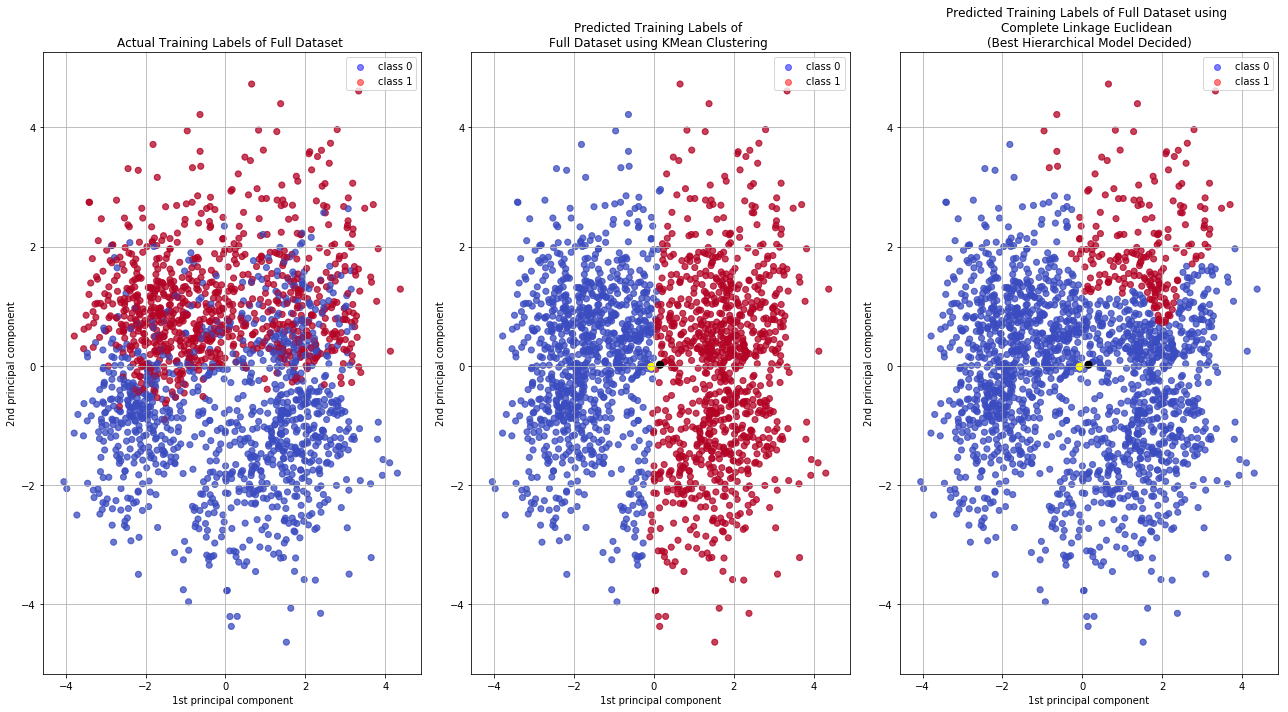

In [28]:
###################Visualizing the predicted training labels vs actual training labels

### Kmeans Clustering
# Model and fit the data to the Kmeans (use fit_predict : Performs clustering on X and returns cluster labels.)
label = data.CLASS
X_train_nosplit, X_test_nosplit, y_train_nosplit, y_test_nosplit = train_test_split(data,label, test_size=0.0) # Splitting up with testing data size as 30%
print(X_train_nosplit.shape,"  ",y_train_nosplit.shape)
# Model and fit the data to the PCA model
pca = PCA(n_components=2).fit(X_train_nosplit)
data2D = pca.transform(X_train_nosplit)

kmeans_dataset_pred = k_means.fit_predict(X_train_nosplit)
centroids = k_means.cluster_centers_
print("Accuracy of KMean Model = {} %".format(accuracy_score(data.CLASS,kmeans_dataset_pred)*100))

stdclf = make_pipeline(StandardScaler(), PCA(n_components=2), GaussianNB())
stdclf.fit(X_train_nosplit, y_train_nosplit)
pred_test_std = std_clf.predict(X_train_nosplit)
pcastd = stdclf.named_steps['pca']
scaler = stdclf.named_steps['standardscaler']
X_pca = pcastd.transform(scaler.transform(X_train_nosplit))

kmeans_pca_pred = k_means.fit_predict(X_pca)


# Model and fit the data to the Agglomerative (use fit_predict : Performs clustering on X and returns cluster labels.)
### Agglomerative Clustering
# Calculate pairwise distance matrix for X
pdm_train = pairwise_distances(X_pca)
#  Model and fit the data to the PCA model
best_hierarchical_agglomerative_model.fit_predict(pdm_train)
aggl_pca_pred = best_hierarchical_agglomerative_model.fit_predict(X_pca)

### Visualize Clusters

FIG_SIZE = (18,10)

# Visualize the predicted Kmeans labels versus  the predicted Agglomerative labels versus Actual labels. 
fig, (ax1, ax2,ax3) = plt.subplots(ncols=3, figsize=FIG_SIZE)

# For...loop to plot the graph for Actual Training Dataset
for l, r, m in zip(range(0, 2), ('red', 'blue'), ('o', 'o')):
    ax2.scatter(X_pca[:,0], X_pca[:,1],c=kmeans_pca_pred,
                cmap='coolwarm',
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )
    

# For...loop to plot the graph for Predicted Training Dataset
for l, p, m in zip(range(0, 2), ('blue', 'red'), ('o','o')):
    ax1.scatter(X_pca[:,0], X_pca[:,1],c=kmeans_dataset_pred,
                cmap='coolwarm',
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )
for l, r, m in zip(range(0, 2), ('red', 'blue'), ('o', 'o')):
    ax3.scatter(X_pca[:,0], X_pca[:,1],c=aggl_pca_pred,
                cmap='coolwarm',
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )
    
ax2.scatter(centroids[:, 0], centroids[:, 1], c=('yellow','black'), s=50, alpha=1);
ax3.scatter(centroids[:, 0], centroids[:, 1], c=('yellow','black'), s=50, alpha=1);
ax1.set_title('Actual Training Labels of Full Dataset ')
ax2.set_title('Predicted Training Labels of \nFull Dataset using KMean Clustering ')
ax3.set_title('Predicted Training Labels of Full Dataset using \n{} \n(Best Hierarchical Model Decided)'.format(best_linkage_similarity_pair))
for ax in (ax1, ax2,ax3):
    ax.set_xlabel('1st principal component')
    ax.set_ylabel('2nd principal component')
    ax.legend(loc='upper right')
    ax.grid()



for m in (ax1,ax2,ax3):
    leg = m.get_legend()
    leg.legendHandles[0].set_color('blue')
    leg.legendHandles[1].set_color('red')

plt.tight_layout()
plt.show()


## Comparing K-Means Clustering &  Hierarchical Agglomerative Clustering

Printing out confusion matrices for kmeans and agglomerative clustering. Also, comparing precision, recall, and F1-score for both model.

Confusion matrix of KMean Clustering (True Count)
[[422 418]
 [526 519]]
Confusion matrix of Agglomerative Clustering (True Count)
[[741  99]
 [938 107]]


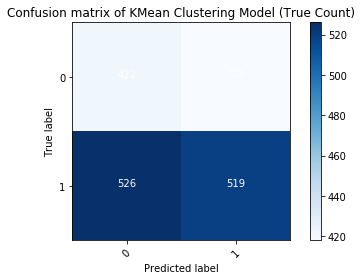

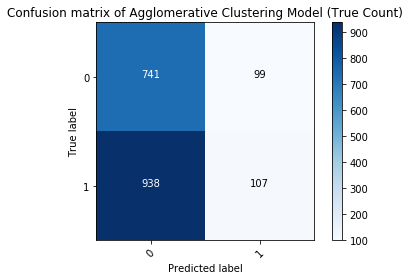

Classification Report for KMean Clustering Model : 
               precision    recall  f1-score   support

           0       0.45      0.50      0.47       840
           1       0.55      0.50      0.52      1045

   micro avg       0.50      0.50      0.50      1885
   macro avg       0.50      0.50      0.50      1885
weighted avg       0.51      0.50      0.50      1885

Classification Report for Agglomerative Clustering Model (Complete Linkage Euclidean): 
               precision    recall  f1-score   support

           0       0.44      0.88      0.59       840
           1       0.52      0.10      0.17      1045

   micro avg       0.45      0.45      0.45      1885
   macro avg       0.48      0.49      0.38      1885
weighted avg       0.48      0.45      0.36      1885

  My Observation 
         It is a close call to decide on the clustering model 
         (KMean or Hierarchical Clustering) based on the Precision, Recall and F1 scores. The 
         classification repo

In [29]:

from sklearn.metrics import classification_report
# Confusion Matrix for KMean
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          matrix='',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix {}".format(matrix))
    else:
        print('Confusion matrix {} (True Count)'.format(matrix))

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix_kmean = confusion_matrix(data.CLASS,kmeans_pca_pred)
cnf_matrix_agglm = confusion_matrix(data.CLASS,aggl_pca_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_kmean, classes=data.CLASS.unique(),
                      title='Confusion matrix of KMean Clustering Model (True Count)',matrix='of KMean Clustering')
plt.figure()
plot_confusion_matrix(cnf_matrix_agglm, classes=data.CLASS.unique(),
                      title='Confusion matrix of Agglomerative Clustering Model (True Count)',matrix='of Agglomerative Clustering')
plt.show()

print("\033[1mClassification Report for KMean Clustering Model : \n",classification_report(data.CLASS,kmeans_pca_pred))
print("\033[1mClassification Report for Agglomerative Clustering Model ({}): \n".format(best_linkage_similarity_pair),classification_report(data.CLASS,aggl_pca_pred))

print("""\033[0m  My Observation \n         It is a close call to decide on the clustering model 
         (KMean or Hierarchical Clustering) based on the Precision, Recall and F1 scores. The 
         classification report parameters are changing with ever run, but from fig. 2 of Task 3a 
         it is clear that KMean model always creates a definitive demarcation between 'Class 0' 
         and 'Class 1'.
         
         However, for the agglomerative hierarchical model, there is no clear/definitive demarcation
         for the two clusters always. If lucky we get a clear division of two classes with this technique,
         but not always.""")
